<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:26px 26px; border-radius:15px; font-size:40px;'><B>Show Up </B> for Health - SDAE</div><span style='color: #273333; padding:26px 26px; font-size:11px;'> Powered by <B>AutoNote </B>and<b> 🍏 ShowUp </b>helper class</B></span><div style='margin:4px 26px; color:#273333; font-size:17px;'>
<ol>
<li><B>Problem statement</B>: A clear description of the problem the project aims to solve.</li><BR>
<li><B>Data source</B>: Information on where the data used in the project is obtained from.</li><BR>
<li><B>Libraries used</B>: A list of the Python libraries used in the project and a brief explanation of their role. Include library version.</li><BR>
<li><B>Exploratory Data Analysis (EDA)</B>: A summary of the initial findings from exploring the data.</li><BR>
<li><B>Preprocessing</B>: Steps taken to clean and prepare the data for model building.</li><BR>
<li><B>Model building</B>: An overview of the model used and the reasoning behind its selection.</li><BR>
 Precision = $\frac{\text{true positives}}{\text{true positives + false positives}}$, Recall = $\frac{\text{true positives}}{\text{true positives + false negatives}}$, F1 = $2 \times \frac{\text{precision} \times \text{recall}}{\text{precision + recall}}$</li><BR><BR>
<li><B>Model evaluation</B>: Evaluation metrics used to assess the performance of the model and results of the evaluation.</li><BR>
<li><B>Conclusion</B>: A summary of the findings and recommendations for further work.</li>
</ol>
</div>

#  🍏 Loading Helper Class

wandb_api_key: 651204c459ad2877b0d32ae2f37ce28d159a9cbe

In [1]:
import wandb
wandb.login()

wandb: Currently logged in as: drjanduplessis (bromptonhealthpcn). Use `wandb login --relogin` to force relogin


True

In [1]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
warnings.filterwarnings('ignore')

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

# 📙 Loading Libraries

In [2]:
''' Scikit-Learn'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix

''' Imbalanced Classes'''
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

''' Tensorflow Keras'''
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from showupforhealth.params import *
from showupforhealth.utils import *


# 💾 Build Surgery Datasets
Merge **Appointment Data** with **Surgery Disease Register**, Weather and IMD2023

In [34]:
data = pd.read_csv(f'{OUTPUT_DATA}full_train_data.csv')
data.head()

,Appointment_status,temp,precipitation,Age,Sex,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,IMD2023,dist_to_station,distance_to_surg,book_to_app_days,booked_by_clinician,registered_for_months,sin_week,cos_week,sin_Appointment_time,cos_Appointment_time,sin_month,cos_month,sin_day_of_week,cos_day_of_week,No_shows,Rota_ARRS,Rota_GP,Rota_HCA,Rota_Nurse,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed,Ethnicity_Other,Ethnicity_White
0,1,17.7,0.0,40,0,0.00,0,0,0,0,0,0,0,22698.0,0.519419,0.816996,54.0,1,17.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,18.5,0.0,70,2,0.39,0,1,0,1,1,0,0,10169.0,0.540792,1.656309,49.0,0,12.0,-0.120537,-0.992709,0.500000,-0.866025,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1,18.5,0.0,70,2,0.39,0,1,0,1,1,0,0,10169.0,0.540792,1.656309,49.0,0,12.0,-0.120537,-0.992709,0.500000,-0.866025,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1,19.4,0.0,66,2,0.03,1,0,0,0,1,0,0,8243.0,0.332691,0.600495,37.0,0,70.0,-0.120537,-0.992709,0.258819,-0.965926,-0.5,-0.866025,0.433884,-0.900969,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,18.3,0.0,58,0,0.11,0,1,0,0,0,0,0,7626.0,0.155802,0.215224,27.0,0,28.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.433884,-0.900969,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Define X and y

In [35]:
# Define X and y
X, y = define_X_y(data, 'Appointment_status')

X - independant variable shape: (901516, 36)
y - dependant variable - Appointment_status: (901516,)


# ✂️ Split data

In [23]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, val_size=0.2, test_size=0.1)

✅ OUTPUT: X_train, X_val, X_test, y_train, y_val, y_test
Train Set:  X_train, y_train - (631060, 36), (631060,)
  Val Set:  X_val, y_val - - - (180304, 36), (180304,)
 Test Set:  X_test, y_test - - (90152, 36), (90152,)


# ⚖️ Class imbalance
Including **distribution of imbalance** within train, val and test sets.

In [24]:
# How many "fraud" samples do I have in each split?
print("DNA distribution in train val and test set pre-oversampling")
print("-"*75)
print(f"There are {pd.Series(y_train).value_counts()[0]} DNAs in the train set")
print(f"There are {pd.Series(y_val).value_counts()[0]} DNAs in the val set")
print(f"There are {pd.Series(y_test).value_counts()[0]} DNAs in the test set")

DNA distribution in train val and test set pre-oversampling
---------------------------------------------------------------------------
There are 24036 DNAs in the train set
There are 6816 DNAs in the val set
There are 3532 DNAs in the test set


# 🔁 Oversampling SMOTE

In [25]:
# Oversampling with SMOTE
X_train, y_train = oversample_with_smote(X_train, y_train, sampling_strategy=0.1)

✅ Data Oversampled: SMOTE - X_train_os:(667726, 36) y_train_os :(667726,)


In [ ]:
# How many "fraud" samples do I have in each split?
print("DNAs in X_train_o post-oversampling")
print("-"*75)
print(f"There are {pd.Series(y_train_o).value_counts()[0]} DNAs in the train set")

In [9]:
#Scale data
# Fit the scaler on the training data
scaler = fit_scaler(X_train, scaler_type='minmax')

In [26]:
# Use the fitted scaler to transform both training and test datasets
X_train_scaled = transform_data(X_train, scaler)
X_val_scaled = transform_data(X_val, scaler)
X_test_scaled = transform_data(X_test, scaler)

In [27]:
X_train_scaled.head()

,temp,precipitation,Age,Sex,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,IMD2023,dist_to_station,distance_to_surg,book_to_app_days,booked_by_clinician,registered_for_months,sin_week,cos_week,sin_Appointment_time,cos_Appointment_time,sin_month,cos_month,sin_day_of_week,cos_day_of_week,No_shows,Rota_ARRS,Rota_GP,Rota_HCA,Rota_Nurse,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed,Ethnicity_Other,Ethnicity_White
0,0.564593,0.0,0.773585,0.666667,0.666667,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.051433,0.208648,0.019406,0.022951,1.0,0.360544,0.057272,0.267638,0.146447,0.156961,0.000000,0.500000,0.722521,5.551115e-17,0.023810,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.495215,0.0,0.632075,0.000000,0.106667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.253749,0.118400,0.025214,0.049180,0.0,0.272109,0.057272,0.267638,0.933013,0.267949,0.000000,0.500000,0.722521,5.551115e-17,0.023810,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.531100,0.0,0.311321,0.000000,0.080000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.718045,0.265990,0.023687,0.000000,0.0,0.122449,0.003646,0.560268,0.146447,0.156961,0.066987,0.750000,0.500000,1.000000e+00,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.940191,0.0,0.707547,0.000000,0.186667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.349426,0.155233,0.021973,0.000000,1.0,0.455782,0.322698,0.032492,0.066987,0.267949,0.250000,0.066987,0.500000,1.000000e+00,0.007937,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.217703,0.0,0.632075,0.000000,0.146667,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.811510,0.225699,0.038441,0.039344,0.0,0.244898,0.831561,0.874255,0.146447,0.156961,0.933013,0.750000,0.500000,1.000000e+00,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# 🧠 Neural Network iterations

In [12]:
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred): # defining a custom F1 score metric
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

metrics = [
    keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
    f1_score,  # adding the custom F1 score metric
#     keras.metrics.TruePositives(name='tp'),
#     keras.metrics.FalsePositives(name='fp'),
#     keras.metrics.TrueNegatives(name='tn'),
#     keras.metrics.FalseNegatives(name='fn'), 
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


In [13]:
def plot_loss_precision_recall_curve(history):

    fig, ax = plt.subplots(3, 2, figsize=(20, 15))

    # --- LOSS 
    ax[0, 0].plot(history.history['loss'], color="#a10606")
    ax[0, 0].plot(history.history['val_loss'], color="#1b5743")
    ax[0, 0].set_title('Model loss', fontsize = 18)
    ax[0, 0].set_ylabel('Loss', fontsize = 14)
    ax[0, 0].legend(['Train', 'Val'], loc='upper right')
    ax[0, 0].grid(axis="x", linewidth=0.5)
    ax[0, 0].grid(axis="y", linewidth=0.5)

    # --- RECALL
    ax[0, 1].plot(history.history['recall']) 
    ax[0, 1].plot(history.history['val_recall'])
    ax[0, 1].set_title('Model recall', fontsize = 18)
    ax[0, 1].set_ylabel('Recall', fontsize = 14) 
    ax[0, 1].legend(['Train', 'Val'], loc='lower right')
    ax[0, 1].grid(axis="x", linewidth=0.5)
    ax[0, 1].grid(axis="y", linewidth=0.5)

    # --- PRECISION
    ax[1, 0].plot(history.history['precision'])
    ax[1, 0].plot(history.history['val_precision'])
    ax[1, 0].set_title('Model precision', fontsize = 18)
    ax[1, 0].set_ylabel('Precision', fontsize = 14)
    ax[1, 0].legend(['Train', 'Val'], loc='lower right')
    ax[1, 0].grid(axis="x", linewidth=0.5)
    ax[1, 0].grid(axis="y", linewidth=0.5)

    # --- F1 SCORE 
    ax[1, 1].plot(history.history['f1_score'])
    ax[1, 1].plot(history.history['val_f1_score']) 
    ax[1, 1].set_title('Model F1 Score', fontsize = 18)
    ax[1, 1].set_ylabel('F1 Score', fontsize = 14)
    ax[1, 1].legend(['Train', 'Val'], loc='lower right')
    ax[1, 1].grid(axis="x", linewidth=0.5)
    ax[1, 1].grid(axis="y", linewidth=0.5)
    
    # --- AUC
    ax[2, 0].plot(history.history['auc'])
    ax[2, 0].plot(history.history['val_auc'])
    ax[2, 0].set_title('Model AUC', fontsize = 18) 
    ax[2, 0].set_ylabel('AUC', fontsize = 14)
    ax[2, 0].legend(['Train', 'Val'], loc='lower right')
    ax[2, 0].grid(axis="x", linewidth=0.5)
    ax[2, 0].grid(axis="y", linewidth=0.5)


#     ax[2, 1].plot(history.history['tp'])
#     ax[2, 1].plot(history.history['val_tp'])
#     ax[2, 1].set_title('Model True Positive', fontsize = 18) 
#     ax[2, 1].set_ylabel('TP', fontsize = 14)
#     ax[2, 1].legend(['Train', 'Val'], loc='lower right')
#     ax[2, 1].grid(axis="x", linewidth=0.5)
#     ax[2, 1].grid(axis="y", linewidth=0.5)

    # Set common labels  
    fig.text(0.5, 0.04, 'Epoch', ha='center', va='center', fontsize=14) 

    plt.show()

In [54]:
import random
import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

# Start a run, tracking hyperparameters
wandb.init(
    # set the wandb project where this run will be logged
    project="ShowUp NEW DATA",

    # track hyperparameters and run metadata with wandb.config
    config={
        "layer_1": 64,
        "activation_1": "relu",
        "dropout": random.uniform(0.3, 0.8),
        "layer_2": 128,
        "activation_2": "relu",
        "dropout": random.uniform(0.3, 0.8),
        "layer_3": 64,
        "activation_3": "relu",
        "dropout": random.uniform(0.3, 0.8),
        "layer_4": 16,
        "activation_4": "relu",
        "dropout": random.uniform(0.3, 0.8),
        "layer_5": 32,
        "activation_5": "relu",
        "dropout": random.uniform(0.3, 0.8),
        "optimizer": "adam",
        "loss": "binary_crossentropy",
        "metric": "accuracy",
        "epoch": 100,
        "batch_size": 128
    }
)

In [53]:
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1

def add_noise(data, noise_factor=0.8):
    noise = np.random.normal(loc=0.0, scale=noise_factor, size=data.shape)
    noisy_data = data + noise
    return np.clip(noisy_data, 0., 1.)

def build_autoencoder(input_dim, encoding_dim, lambda_regularization):
    input_data = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu', activity_regularizer=l1(lambda_regularization))(input_data)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    autoencoder = Model(input_data, decoded)
    encoder = Model(input_data, encoded)
    return autoencoder, encoder

def train_denoising_autoencoder(X, y, encoding_dim=36, lambda_regularization=1e-5):
    # Split data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

    noisy_X_train = add_noise(X_train)
    noisy_X_val = add_noise(X_val)

    autoencoders = []
    encoders = []
    current_input_dim = X.shape[1]  # initial input dimension based on input features

    # Build two autoencoders
    for _ in range(2): 
        autoencoder, encoder = build_autoencoder(current_input_dim, encoding_dim, lambda_regularization)
        autoencoders.append(autoencoder)
        encoders.append(encoder)
        current_input_dim = encoding_dim  # Update for the next autoencoder

    encoded_X_train = noisy_X_train
    encoded_X_val = noisy_X_val

    # Train each autoencoder
    for i, autoencoder in enumerate(autoencoders):
        autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
        autoencoder.fit(encoded_X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(encoded_X_val, X_val))
        
        # Update encoded_X_train and encoded_X_val to be the encoded output of the current autoencoder for the next autoencoder's training
        encoded_X_train = encoders[i].predict(encoded_X_train)
        encoded_X_val = encoders[i].predict(encoded_X_val)

    # Fine-tuning
    final_encoded = Input(shape=(encoding_dim,))
    final_output = Dense(1, activation='sigmoid')(final_encoded)  # Binary classifier for predicting no-shows
    classifier = Model(final_encoded, final_output)

    # Link all autoencoders
    input_data = Input(shape=(X.shape[1],))
    encoded_data = input_data
    for encoder in encoders:
        encoded_data = encoder(encoded_data)

    predictions = classifier(encoded_data)
    final_model = Model(input_data, predictions)
    final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    final_model.fit(X_train, y_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_val, y_val))
    
    # Evaluate on test data
    test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy*100:.2f}%")
    
    return final_model

In [54]:
# Usage:
# X, y = ...  # Load your data here
trained_model = train_denoising_autoencoder(X, y)

Epoch 1/50
2113/2113 [==============================] - 2s 778us/step - loss: -712307.7500 - val_loss: -2037768.6250
Epoch 2/50
2113/2113 [==============================] - 2s 735us/step - loss: -4380622.0000 - val_loss: -7117145.0000
Epoch 3/50
2113/2113 [==============================] - 2s 741us/step - loss: -10619696.0000 - val_loss: -14440146.0000
Epoch 4/50
2113/2113 [==============================] - 2s 743us/step - loss: -19001920.0000 - val_loss: -23837404.0000
Epoch 5/50
2113/2113 [==============================] - 2s 747us/step - loss: -29430288.0000 - val_loss: -35275548.0000
Epoch 6/50
2113/2113 [==============================] - 2s 749us/step - loss: -41969256.0000 - val_loss: -48856128.0000
Epoch 7/50
2113/2113 [==============================] - 2s 766us/step - loss: -56602692.0000 - val_loss: -64485956.0000
Epoch 8/50
2113/2113 [==============================] - 2s 756us/step - loss: -73277824.0000 - val_loss: -82144808.0000
Epoch 9/50
2113/2113 [=======================

2113/2113 [==============================] - 2s 754us/step - loss: -249635897344.0000 - val_loss: -264236777472.0000
Epoch 17/50
2113/2113 [==============================] - 2s 736us/step - loss: -280378703872.0000 - val_loss: -295783792640.0000
Epoch 18/50
2113/2113 [==============================] - 2s 748us/step - loss: -312850284544.0000 - val_loss: -329063071744.0000
Epoch 19/50
2113/2113 [==============================] - 2s 738us/step - loss: -347068465152.0000 - val_loss: -364088360960.0000
Epoch 20/50
2113/2113 [==============================] - 2s 749us/step - loss: -383007948800.0000 - val_loss: -400815390720.0000
Epoch 21/50
2113/2113 [==============================] - 2s 736us/step - loss: -420663001088.0000 - val_loss: -439260315648.0000
Epoch 22/50
2113/2113 [==============================] - 2s 735us/step - loss: -460046303232.0000 - val_loss: -479438045184.0000
Epoch 23/50
2113/2113 [==============================] - 2s 744us/step - loss: -501164081152.0000 - val_loss:

2113/2113 [==============================] - 1s 673us/step - loss: 1434072.1250 - accuracy: 0.9278 - val_loss: 1974411.2500 - val_accuracy: 0.9616
Epoch 24/50
2113/2113 [==============================] - 1s 670us/step - loss: 1395608.6250 - accuracy: 0.9276 - val_loss: 1471912.1250 - val_accuracy: 0.9616
Epoch 25/50
2113/2113 [==============================] - 1s 657us/step - loss: 1357114.6250 - accuracy: 0.9277 - val_loss: 1714220.6250 - val_accuracy: 0.9616
Epoch 26/50
2113/2113 [==============================] - 1s 668us/step - loss: 1328681.7500 - accuracy: 0.9278 - val_loss: 1973634.3750 - val_accuracy: 0.9616
Epoch 27/50
2113/2113 [==============================] - 1s 667us/step - loss: 1288246.7500 - accuracy: 0.9276 - val_loss: 1485578.1250 - val_accuracy: 0.9616
Epoch 28/50
2113/2113 [==============================] - 1s 669us/step - loss: 1253550.2500 - accuracy: 0.9282 - val_loss: 819970.6875 - val_accuracy: 0.0384
Epoch 29/50
2113/2113 [==============================] - 1s

In [52]:
from tensorflow.keras.layers import BatchNormalization, Normalization
from tensorflow.keras.optimizers import Adam

def init_model():

    # Assuming X_train_o_s is globally accessible; otherwise, pass it as a parameter.
    # Only take the dimensions of a single sample, excluding the batch size.
    input_shape = X_train_scaled.shape[1:]

    model = models.Sequential()

    # Input layer specifying the shape
    model.add(layers.InputLayer(input_shape=input_shape))

    model.add(layers.Dense(64, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(layers.Dense(128, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(layers.Dense(64, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(16, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(layers.Dense(32, activation='relu'))
    #model.add(BatchNormalization())

    model.add(layers.Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=1e-4)
    
    # Assuming 'metrics' is defined globally; otherwise, specify it directly or pass it as a parameter.
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

    return model

In [30]:
model = init_model()
#model.summary()

In [57]:
es = EarlyStopping(
    patience=40,
    monitor='val_recall', # We really want to detect fraudulent transactions!
    restore_best_weights=True)

history = model.fit(X_train_scaled, y_train_o,
                    validation_data=(X_val_scaled, y_val),
                    epochs=100,
                    batch_size=128, # Large enough to get a decent chance of containing fraudulent transactions 
                    callbacks=[es,
                      WandbMetricsLogger(log_freq=5),
                      WandbModelCheckpoint("models")], 
                    shuffle=True,
                    verbose=3
                   )

Epoch 1/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 2/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 3/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 4/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 5/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 6/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 7/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 8/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 9/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 10/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 11/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 12/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 13/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 14/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 15/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 16/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 17/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 18/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 19/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 20/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 21/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 22/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 23/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 24/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 25/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 26/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 27/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 28/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 29/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 30/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 31/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 32/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 33/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 34/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 35/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 36/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 37/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 38/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 39/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 40/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 41/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 42/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 43/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 44/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 45/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 46/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 47/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 48/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 49/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 50/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 51/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 52/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 53/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 54/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 55/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 56/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 57/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 58/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 59/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 60/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 61/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 62/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 63/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 64/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 65/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 66/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 67/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 68/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 69/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 70/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 71/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 72/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 73/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 74/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 75/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 76/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 77/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 78/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 79/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 80/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 81/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 82/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 83/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 84/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 85/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 86/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 87/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 88/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 89/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 90/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 91/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 92/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 93/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 94/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 95/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 96/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 97/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 98/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 99/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 100/100
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


In [58]:
wandb.finish()


batch/accuracy,▁▃▅▅▆▆▆▇▇▇▇▇▇▇▇▇████▆███████████████████
batch/auc,▁▅▆▆▇▇▇▇████████████████████████████████
batch/batch_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/cross entropy,█▅▄▄▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/f1_score,▁▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇████▆███████████████████
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,█▅▄▄▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/prc,▁▅▆▆▇▇▇▇████████████████████████████████
batch/precision,▁▂▅▅▆▆▆▇▇▇▇▇▇▇▇▇████▆███████████████████
batch/recall,▁█▂▃▄▃▃▃▄▄▅▄▅▅▅▅▆▆▅▆▃▆▅▆▆▆▆▇▇▇▆▆▇▇▇▇▇▇▇▆
epoch/accuracy,▁▃▅▅▆▆▆▇▇▇▇▇▇▇▇▇████████████████████████


In [ ]:
plot_loss_precision_recall_curve(history)
print("Show Up for Health")

# Score model on unseen dataset

In [47]:
trained_model.predict(X_test_scaled)

2818/2818 [==============================] - 1s 244us/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [49]:
trained_model.evaluate(X_test_scaled, y_test, verbose=0, return_dict=True)

{'loss': 798.5171508789062, 'accuracy': 0.9608217477798462}

In [64]:
from datetime import datetime

now = datetime.now()
datetime_string = now.strftime("%Y-%m-%d %H-%M-%S")

model.save(f'model_weights_{datetime_string}.h5')

In [65]:
y_pred_proba = model.predict(X_test_scaled)

2818/2818 [==============================] - 1s 312us/step


In [66]:
threshold = 0.50 # 50% 

y_pred_binary = np.where(y_pred_proba > threshold, 1, 0 )

## Confusion Matrix

In [67]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred_binary)
cm

array([[ 1777,  1755],
       [ 5405, 81215]])

Text(0.5, 25.722222222222214, 'Predicted label')

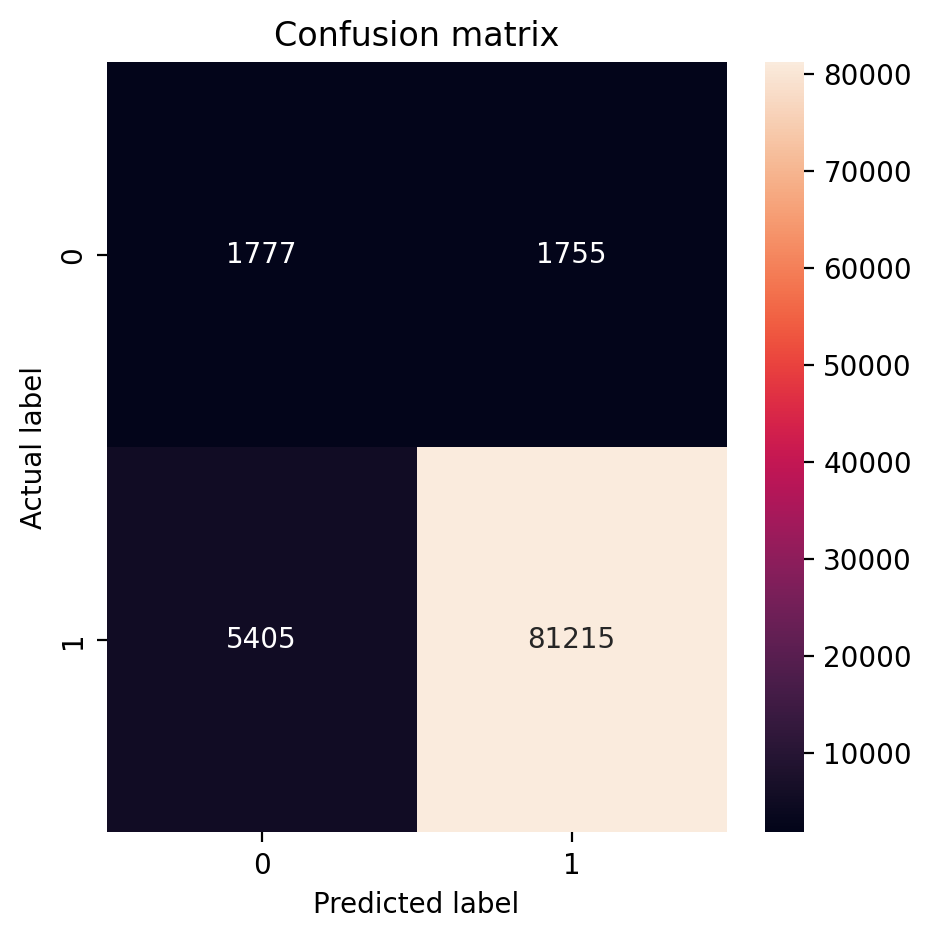

In [68]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       0.25      0.50      0.33      3532
           1       0.98      0.94      0.96     86620

    accuracy                           0.92     90152
   macro avg       0.61      0.72      0.64     90152
weighted avg       0.95      0.92      0.93     90152



In [70]:
from sklearn.metrics import precision_recall_curve

def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = precision_recall_curve(labels, predictions)
    plt.plot(recall, precision, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

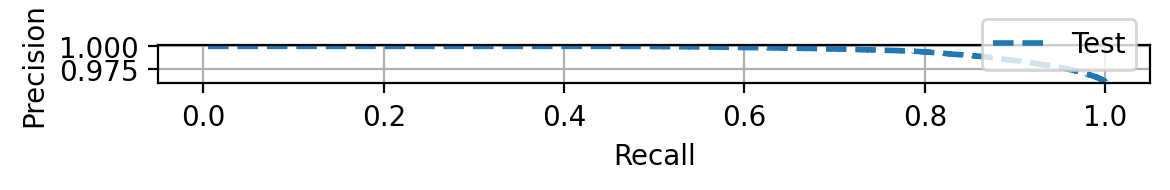

In [71]:
plot_prc("Test", y_test, y_pred_proba, linestyle='--')
plt.legend(loc='lower right')